In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [453]:
def prepare_data(
    dataset: pd.DataFrame, dropna=False, dropPassengerId=False
) -> pd.DataFrame:
    dataset.drop(["Name", "Ticket", "Cabin"], "columns", inplace=True)
    if dropPassengerId:
        dataset.drop("PassengerId", "columns", inplace=True)
    if dropna:
        dataset.dropna(axis="rows", inplace=True)
    else:
        dataset.fillna(
            value={"Age": dataset["Age"].median()}, inplace=True, axis="rows"
        )
        dataset.fillna(
            value={"Fare": dataset["Fare"].median()}, inplace=True, axis="rows"
        )
    encoder = LabelEncoder()
    dataset["Sex"] = encoder.fit_transform(dataset["Sex"].astype(str))
    dataset = pd.get_dummies(dataset, columns=["Embarked"])
    if dataset.isnull().values.any():
        raise ValueError("Dataset contains null value")
    return dataset


In [454]:
train_data = pd.read_csv("datasets/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [455]:
# prepare data
train_data = prepare_data(train_data, dropna=True, dropPassengerId=True)
train_data.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<AxesSubplot:>

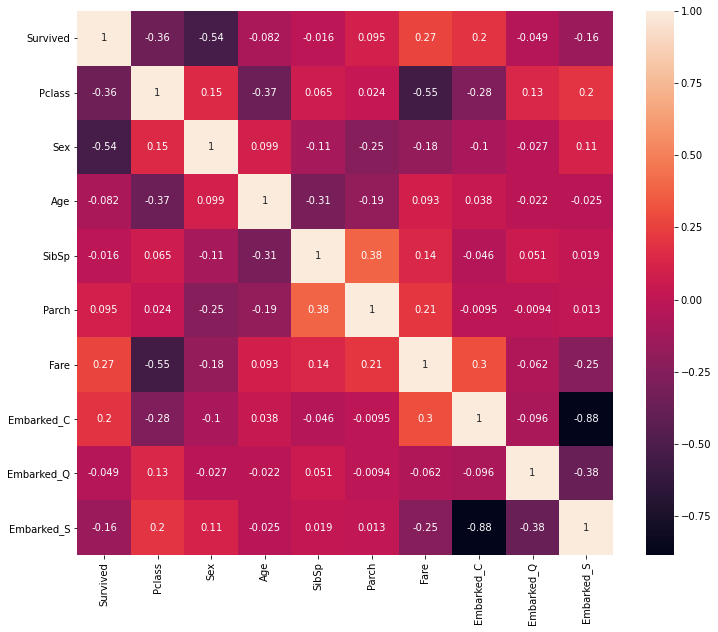

In [456]:
# print(np.any(np.isposinf(train_data["Age"])))
# print(np.any(np.isneginf(train_data["Age"])))
# print(np.where(np.isnan(train_data["Age"])))
# train_data["Age"].describe()
# train_data["Age"].to_csv("ages.csv", index = False)

train_data_corr = train_data.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(train_data_corr, annot=True)


In [481]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X = train_data.drop("Survived", axis="columns")
Y = train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# classifier = LinearDiscriminantAnalysis(solver="svd")
# classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
# classifier = SVC(kernel="poly", C=0.025)
# classifier = DecisionTreeClassifier(max_depth=None, max_features=None)
# classifier = KNeighborsClassifier()
# classifier = GaussianNB(priors=None)
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
num_acc = accuracy_score(y_test, y_pred, normalize=False)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("accuracy_count : ", num_acc, " of ", len(y_test))


accuracy_score :  0.8391608391608392
precision_score :  0.868421052631579
recall_score :  0.6470588235294118
accuracy_count :  120  of  143


In [458]:
test_data = pd.read_csv("datasets/test.csv")
test_data = prepare_data(test_data)
test_data.describe()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,0.244019,0.110048,0.645933
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.430019,0.313324,0.478803
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,0.000000,0.000000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [459]:
X_test = test_data.drop("PassengerId", axis="columns")
predictions = classifier.predict(X_test)


In [460]:
submission_data = pd.DataFrame(
    {"PassengerId": test_data.PassengerId, "Survived": predictions}
)
submission_data.to_csv("datasets/submission.csv", index=False)
